# Data 620 Project2
#### Raghunathan Ramnath, Dilip Ganesan and Ahmed Sajjad

In [1]:
import networkx as nx
import networkx.algorithms.bipartite as bi
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
%matplotlib inline


### CEOs and clubs.

The membership of the chief executive officers from 26 corporations in 15 clubs.

CEOs.net - two-mode network with 41 vertices and 98 edges. 

http://vlado.fmf.uni-lj.si/pub/networks/data/WaFa/default.htm


## 1. Load Data
As a first step we are loading the data into dataframe from csv file. there are two node CEOs and clubs

In [149]:
import numpy as np
import pandas as pd
#df = pd.read_csv("C:\cuny\Fall_2018\DATA-620\Project2\ceos_net.csv")
df = pd.read_csv("https://raw.githubusercontent.com/raghu74us/DATA-620/master/Project2/ceos_net.csv")

df

,CEO,club-1,club-2,club-3,club-4,club-5,club-6,club-7,club-8,club-9,club-10,club-11,club-12,club-13,club-14,club-15
0,CE0-1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0
1,CE0-2,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0
2,CE0-3,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,CE0-4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
4,CE0-5,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
5,CE0-6,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0
6,CE0-7,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0
7,CE0-8,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
8,CE0-9,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0
9,CE0-10,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [100]:
dft = pd.melt(df,id_vars=["CEO"],var_name="CLUB", value_name = "values")
dft.set_index('CEO')
#dft = dft[dft==1]
dft[:5]

,CEO,CLUB,values
0,CE0-1,club-1,0
1,CE0-2,club-1,0
2,CE0-3,club-1,0
3,CE0-4,club-1,0
4,CE0-5,club-1,0


In [92]:
ceos = dft.CEO.unique()
ceos


array(['CE0-1', 'CE0-2', 'CE0-3', 'CE0-4', 'CE0-5', 'CE0-6', 'CE0-7',
       'CE0-8', 'CE0-9', 'CE0-10', 'CE0-11', 'CE0-12', 'CE0-13', 'CE0-14',
       'CE0-15', 'CE0-16', 'CE0-17', 'CE0-18', 'CE0-19', 'CE0-20',
       'CE0-21', 'CE0-22', 'CE0-23', 'CE0-24', 'CE0-25', 'CE0-26'],
      dtype=object)

In [93]:
clubs = dft.CLUB.unique()
clubs

array(['club-1', 'club-2', 'club-3', 'club-4', 'club-5', 'club-6',
       'club-7', 'club-8', 'club-9', 'club-10', 'club-11', 'club-12',
       'club-13', 'club-14', 'club-15'], dtype=object)

In [56]:
stacked = df.set_index('CEO').stack()

stacked = stacked[stacked==1]
#we are interested in the 1's as it indicates the nodes are connected.
stacked

CEO            
CE0-1   club-3     1
        club-4     1
        club-9     1
CE0-2   club-3     1
        club-5     1
        club-7     1
CE0-3   club-3     1
        club-12    1
CE0-4   club-2     1
        club-3     1
        club-15    1
CE0-5   club-3     1
        club-13    1
        club-14    1
CE0-6   club-2     1
        club-3     1
        club-14    1
CE0-7   club-3     1
        club-4     1
        club-10    1
        club-11    1
CE0-8   club-4     1
        club-7     1
        club-10    1
CE0-9   club-1     1
        club-4     1
        club-8     1
        club-10    1
CE0-10  club-3     1
        club-9     1
                  ..
CE0-19  club-3     1
        club-4     1
        club-7     1
        club-9     1
CE0-20  club-2     1
        club-3     1
        club-4     1
        club-11    1
        club-15    1
CE0-21  club-3     1
        club-4     1
        club-8     1
CE0-22  club-3     1
        club-8     1
        club-15    1
CE0-23  club-2    

In [28]:
ceo_club_edges = stacked.index.tolist()
#This gives the list of edges between CEOs and clubs.
ceo_club_edges

[('CE0-1', 'club-3'),
 ('CE0-1', 'club-4'),
 ('CE0-1', 'club-9'),
 ('CE0-2', 'club-3'),
 ('CE0-2', 'club-5'),
 ('CE0-2', 'club-7'),
 ('CE0-3', 'club-3'),
 ('CE0-3', 'club-12'),
 ('CE0-4', 'club-2'),
 ('CE0-4', 'club-3'),
 ('CE0-4', 'club-15'),
 ('CE0-5', 'club-3'),
 ('CE0-5', 'club-13'),
 ('CE0-5', 'club-14'),
 ('CE0-6', 'club-2'),
 ('CE0-6', 'club-3'),
 ('CE0-6', 'club-14'),
 ('CE0-7', 'club-3'),
 ('CE0-7', 'club-4'),
 ('CE0-7', 'club-10'),
 ('CE0-7', 'club-11'),
 ('CE0-8', 'club-4'),
 ('CE0-8', 'club-7'),
 ('CE0-8', 'club-10'),
 ('CE0-9', 'club-1'),
 ('CE0-9', 'club-4'),
 ('CE0-9', 'club-8'),
 ('CE0-9', 'club-10'),
 ('CE0-10', 'club-3'),
 ('CE0-10', 'club-9'),
 ('CE0-11', 'club-2'),
 ('CE0-11', 'club-3'),
 ('CE0-11', 'club-9'),
 ('CE0-12', 'club-4'),
 ('CE0-12', 'club-7'),
 ('CE0-13', 'club-3'),
 ('CE0-13', 'club-4'),
 ('CE0-13', 'club-5'),
 ('CE0-13', 'club-9'),
 ('CE0-14', 'club-2'),
 ('CE0-14', 'club-3'),
 ('CE0-14', 'club-4'),
 ('CE0-14', 'club-11'),
 ('CE0-14', 'club-12'),
 ('CE

## 2. Analysis

In [29]:
G = nx.Graph(ceo_club_edges)
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 41
Number of edges: 98
Average degree:   4.7805


## 2.1 Graph of Entire Network

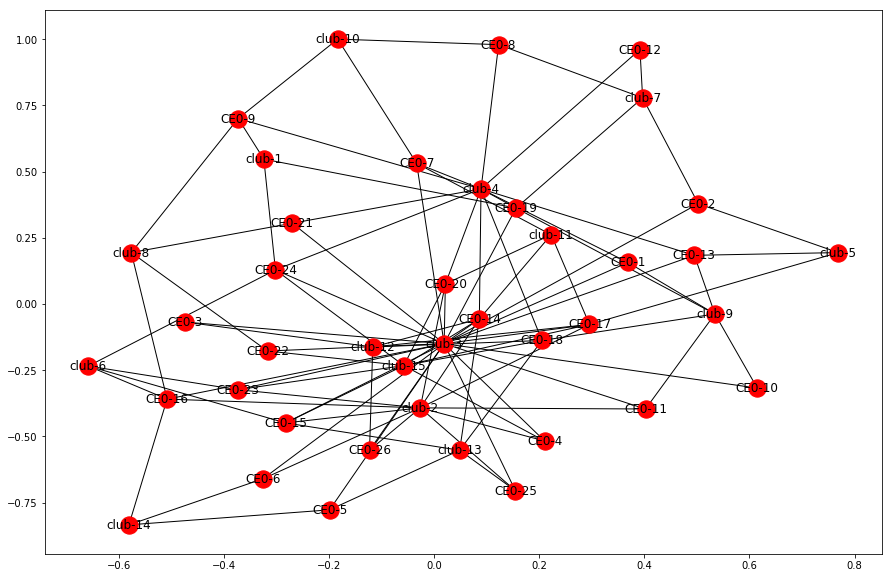

In [30]:
plt.figure(figsize = (15,10))
#graph of the entire network that includes CEOs and Clubs.
nx.draw_networkx(G)

## 2.2 Graph of Clubs

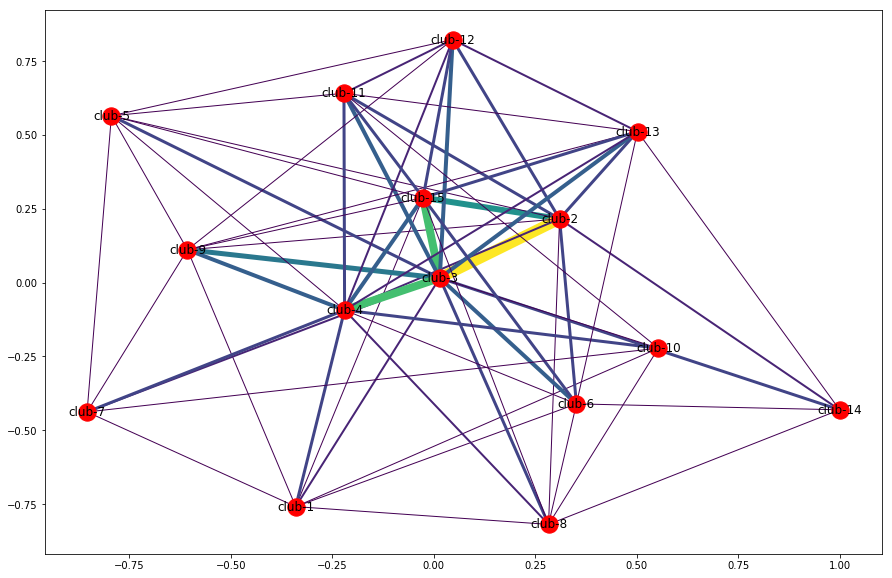

In [31]:
club_Gp = nx.bipartite.project(G,df.set_index('CEO').columns)
# or
# nx.bipartite.project(G,df.set_index('DOC').index)

club_e = bi.weighted_projected_graph(G, club_Gp, ratio=False)
weights=[edata['weight'] for f,t,edata in club_e.edges(data=True)]
plt.figure(figsize=(15,10))
nx.draw_networkx(club_e, width=weights, edge_color=weights)


###  Degree Centrality of Clubs

In [32]:
# Degree of Clubs (number of edges adjacent each node)
def sort_x(x):
    sort = sorted(x.items(), key = lambda kv: (-kv[1], kv[0]) )
    return sort

C_degree = nx.degree(club_Gp)
C_degree = {k:round(v,1) for k, v in (C_degree)}
C_degree = sort_x(C_degree)
C_degree

[('club-3', 14),
 ('club-4', 13),
 ('club-15', 11),
 ('club-2', 11),
 ('club-13', 9),
 ('club-9', 9),
 ('club-1', 8),
 ('club-11', 8),
 ('club-12', 8),
 ('club-5', 8),
 ('club-6', 8),
 ('club-8', 8),
 ('club-10', 6),
 ('club-7', 6),
 ('club-14', 5)]

In [33]:
#Center
print("Center : " , nx.center(club_Gp))

#Diameter
print("Diameter : " ,nx.diameter(club_Gp))

#Radius
print("Radius : " ,nx.radius(club_Gp))

Center :  ['club-3']
Diameter :  2
Radius :  1


## 2.3. Graph of CEOs

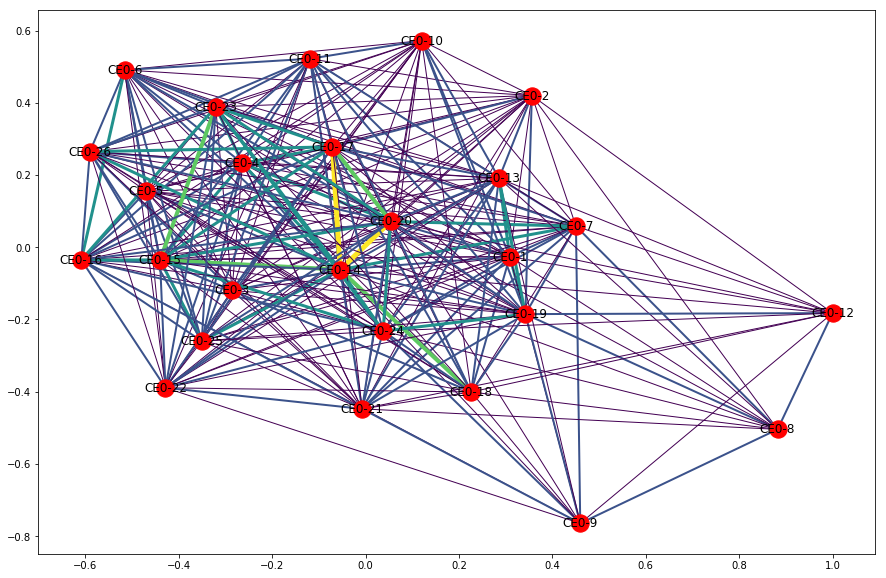

In [34]:
ceo_Gp = nx.bipartite.project(G,df.set_index('CEO').index)
ceo_e = bi.weighted_projected_graph(G, ceo_Gp, ratio=False)

weights=[edata['weight'] for f,t,edata in ceo_e.edges(data=True)]
plt.figure(figsize=(15,10))
nx.draw_networkx(e, width=weights, edge_color=weights)


###  Degree Centrality of CEOs

In [24]:
# Degree of CEOs (number of edges adjacent each node)
def sort_x(x):
    sort = sorted(x.items(), key = lambda kv: (-kv[1], kv[0]) )
    return sort

C_degree = nx.degree(ceo_Gp)
C_degree = {k:round(v,1) for k, v in (C_degree)}
C_degree = sort_x(C_degree)
C_degree

[('CE0-1', 25),
 ('CE0-13', 25),
 ('CE0-14', 25),
 ('CE0-19', 25),
 ('CE0-20', 25),
 ('CE0-21', 25),
 ('CE0-24', 25),
 ('CE0-7', 25),
 ('CE0-2', 23),
 ('CE0-22', 23),
 ('CE0-10', 22),
 ('CE0-11', 22),
 ('CE0-15', 22),
 ('CE0-16', 22),
 ('CE0-17', 22),
 ('CE0-18', 22),
 ('CE0-23', 22),
 ('CE0-25', 22),
 ('CE0-26', 22),
 ('CE0-3', 22),
 ('CE0-4', 22),
 ('CE0-5', 22),
 ('CE0-6', 21),
 ('CE0-9', 13),
 ('CE0-12', 12),
 ('CE0-8', 12)]

In [25]:
#Center
print("Center : " , nx.center(ceo_Gp))

#Diameter
print("Diameter : " ,nx.diameter(ceo_Gp))

#Radius
print("Radius : " ,nx.radius(ceo_Gp))

Center :  ['CE0-1', 'CE0-7', 'CE0-13', 'CE0-14', 'CE0-19', 'CE0-20', 'CE0-21', 'CE0-24']
Diameter :  2
Radius :  1


From the stats output we can see the center is occupied by 8 CEOs ('CE0-1', 'CE0-7', 'CE0-13', 'CE0-14', 'CE0-19', 'CE0-20', 'CE0-21', 'CE0-24') 
and 1 Club (Club-3).


## 3. Island Analysis

### CEOs

In [151]:
## Implementing the Island Method to identify subgroups. 
def trim_edges(g, weight = 1):
    # Implements a trimming of the graph edges for the Island Analysis
    g2 = nx.Graph()
    for f, to, edata in g.edges(data=True):
        if edata['weight'] > weight:
            g2.add_edge(f,to,edata)
    return g2

def island_method(g, iterations = 2):
    # Iterates through the graph removing edges and returning the number of edges removed and
    #  the trimmed graph
    weights = [edata['weight'] for f,to,edata in g.edges(data=True)]
    mn=int(min(weights))
    mx=int(max(weights))
    step = int((mx-mn)/iterations)
    return [[threshold, trim_edges(g,variable, threshold)] for threshold in range(mn,mx,step)]

In [152]:
#ceo_nodes = list(dft['CEO'].unique())
#club_nodes = list(dft['CLUB'].unique())


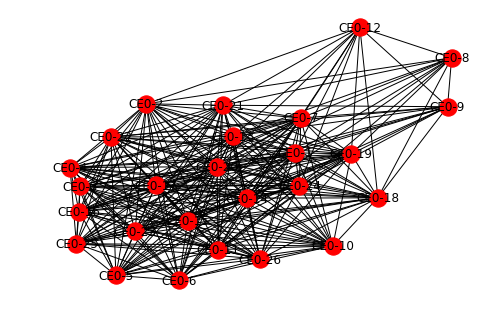

In [153]:
# Build the graph from the node sets and edges
# set bipartite attribute to ensure weighted projection will work
ceo_nodes = list(dft['CEO'].unique())
club_nodes = list(dft['CLUB'].unique())
#edge_bunch = [tuple(i) for i in dft.values]

g = nx.Graph()
g.add_nodes_from(ceo_nodes,node_type='CEO', bipartite=0)
g.add_nodes_from(club_nodes,node_type='CLUB', bipartite=1)
g.add_edges_from(ceo_club_edges)

l=bi.weighted_projected_graph(g,ceo_nodes)
pos = nx.spring_layout(l)
nx.draw(l, pos = pos, with_labels=True)
#nx.draw_networkx_edge_labels(l, pos)

## Running the Island Analysis on the graph. 
#Gp3 = nx.bipartite.project(G, df.set_index('CEO').index)
#e3 = bi.weighted_projected_graph(G, Gp3, ratio=False)
#cc=list(nx.connected_component_subgraphs(e3))[0]
#print(nx.info(cc))
#islands = island_method(cc)
#print ('')
#print ('Depth  CEO  Groups')
#print ('---------------------')
#for island in islands:
#    print(' %d      %2d      %d' (island[0], len(island[1]), len(list(nx.connected_component_subgraphs(island[1])))))

In [154]:
cc=list(nx.connected_component_subgraphs(l))[0]
#print(nx.info(cc))
#variable='weight'
islands = island_method(cc)


TypeError: trim_edges() takes from 1 to 2 positional arguments but 3 were given